Demo sử dụng mạng nơ ron tế bào để tìm biên của ảnh, dùng ODE trong thư viện Scipy để giải phương trình trạng thái.

In [1]:
import scipy.signal as sig
import scipy.integrate as sint
from PIL import Image as img
import numpy as np

def hamTrangThai(t, x, Ib, Bu, tempA, n, m):
    x = x.reshape(n, m)
    dx = -x + Ib + Bu + sig.convolve2d(hamDauRa(x), tempA, 'same')
    return dx.reshape(n*m)

def hamDauRa(x):
    return 0.5 * (abs(x + 1) - abs(x - 1))

In [2]:
def xuLyAnh(inputLocation, outputLocation, tempA, tempB, initialCondition, Ib, t):
    """
    inputLocation: địa chỉ ảnh đầu vào
    outputLocation: địa chỉ ảnh đầu ra
    tempA: ma trận phản hồi
    tempB: ma trận điều khiển
    initialCondition: float
    """
    gray = img.open(inputLocation).convert('RGB')
    m,n = gray.size
    u = np.array(gray)
    u = u[:, :, 0]
    z0 = u * initialCondition
    Bu = sig.convolve2d(u, tempB, 'same')
    z0 = z0.flatten()
    tFinal = t.max()
    tInitial = t.min()
    if t.size > 1:
        dt = t[1] - t[0]
    else:
        dt = t[0]

    ode = sint.ode(hamTrangThai) \
        .set_integrator('vode') \
        .set_initial_value(z0, tInitial) \
        .set_f_params(Ib, Bu, tempA, n, m)
    while ode.successful() and ode.t < tFinal + 0.1:
        print(ode.t)
        ode_result = ode.integrate(ode.t + dt)

    z = hamDauRa(ode_result)
    out_l = z[:].reshape(n, m)
    out_l = out_l / (255.0)
    out_l = np.uint8(np.round(out_l * 255))

    out = img.fromarray(out_l).convert('RGB')
    out.save(outputLocation)
    print('done')
    return out

0.0
1.0
done


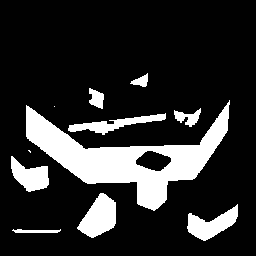

In [32]:
output = xuLyAnh(
    inputLocation = 'images/input1.bmp',
    outputLocation = 'images/output1.png',
    tempA = [[0,0,0],
             [0,1,0],
             [0,0,0]],
    tempB = [[-1,-1,-1],
             [-1,8,-1],
             [-1,-1,-1]],
    initialCondition = 0.0,
    Ib = -1.0,
    t = np.linspace(0.0,1.0,2)
)
output